<div><font face="Times New Roman" size=7><br><br>
<center>
Linear Regression and Regularization
<center><br></div>
 

### Machine Learning for Bioinformatics: Homework 1 (Practical)
*Refer to (preferably)Quera or Amir Soleimanifar for any questions you have or other inconveniences*  
*Telegram ID: @amirsoleix*  
*Email: asoleix@gmail.com*

## Overview
<font face="Arial" size=4><br>
We want to train a model which estimates obesity levels based on eating habits and physical conditions of an individual. For our purpose, we will use a dataset of individuals from the countries of Mexico, Peru and Columbia.  
The dataset was collected by Fabio Mendoza Palechor and ALexis de la Hoz Manotas.

## Description 
<font face="Arial" size=4><br>
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

## Practical Phase 
<font face="Arial" size=4><br>
You need to complete each section by writing the relevant code, running and assessing the results. Feel free to add new code or markdown cells. After all snippets have been completed, save the results and upload the Jupyter notebook.

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [2]:
# Read the dataset
df = pd.read_csv('./dataset_bmi.csv')

## Split the Data  
<font face="Arial" size=4><br>
Split the data to training (80 percent) and test (20 percent) sets using Stratified Sampling on `BMI` column.

In [3]:
df['BMI_range'] = pd.cut(df['BMI'],
                        bins = [0., 18.5, 25, 30.0, np.inf], labels = [ 1, 2, 3, 4])

In [4]:
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2, random_state = 42)

for train_indexes , test_indexes in split.split(df, df["BMI_range"]):
    strat_test_set = df.loc[test_indexes]
    strat_train_set = df.loc[train_indexes]

In [5]:
X_train = strat_train_set.drop("BMI_range", axis = 1)
Y_train = strat_train_set['BMI_range'].copy()

X_test = strat_test_set.drop("BMI_range", axis = 1)
Y_test = strat_test_set['BMI_range'].copy()  

## Exploratory Data Analysis  
<font face="Arial" size=4><br>
Analyze the data and find information about different attributes. Requested items are:
1. Number of categories and distribution of them in either plots or numbers
2. Mean, std, and quartiles of numerical attributes
3. Check for existence of NaN or empty rows  

Visualize the dataset in convenient way and measure the correlation between different columns of the matrix using `corr()` command.

In [6]:
BMI_df = X_train.copy()

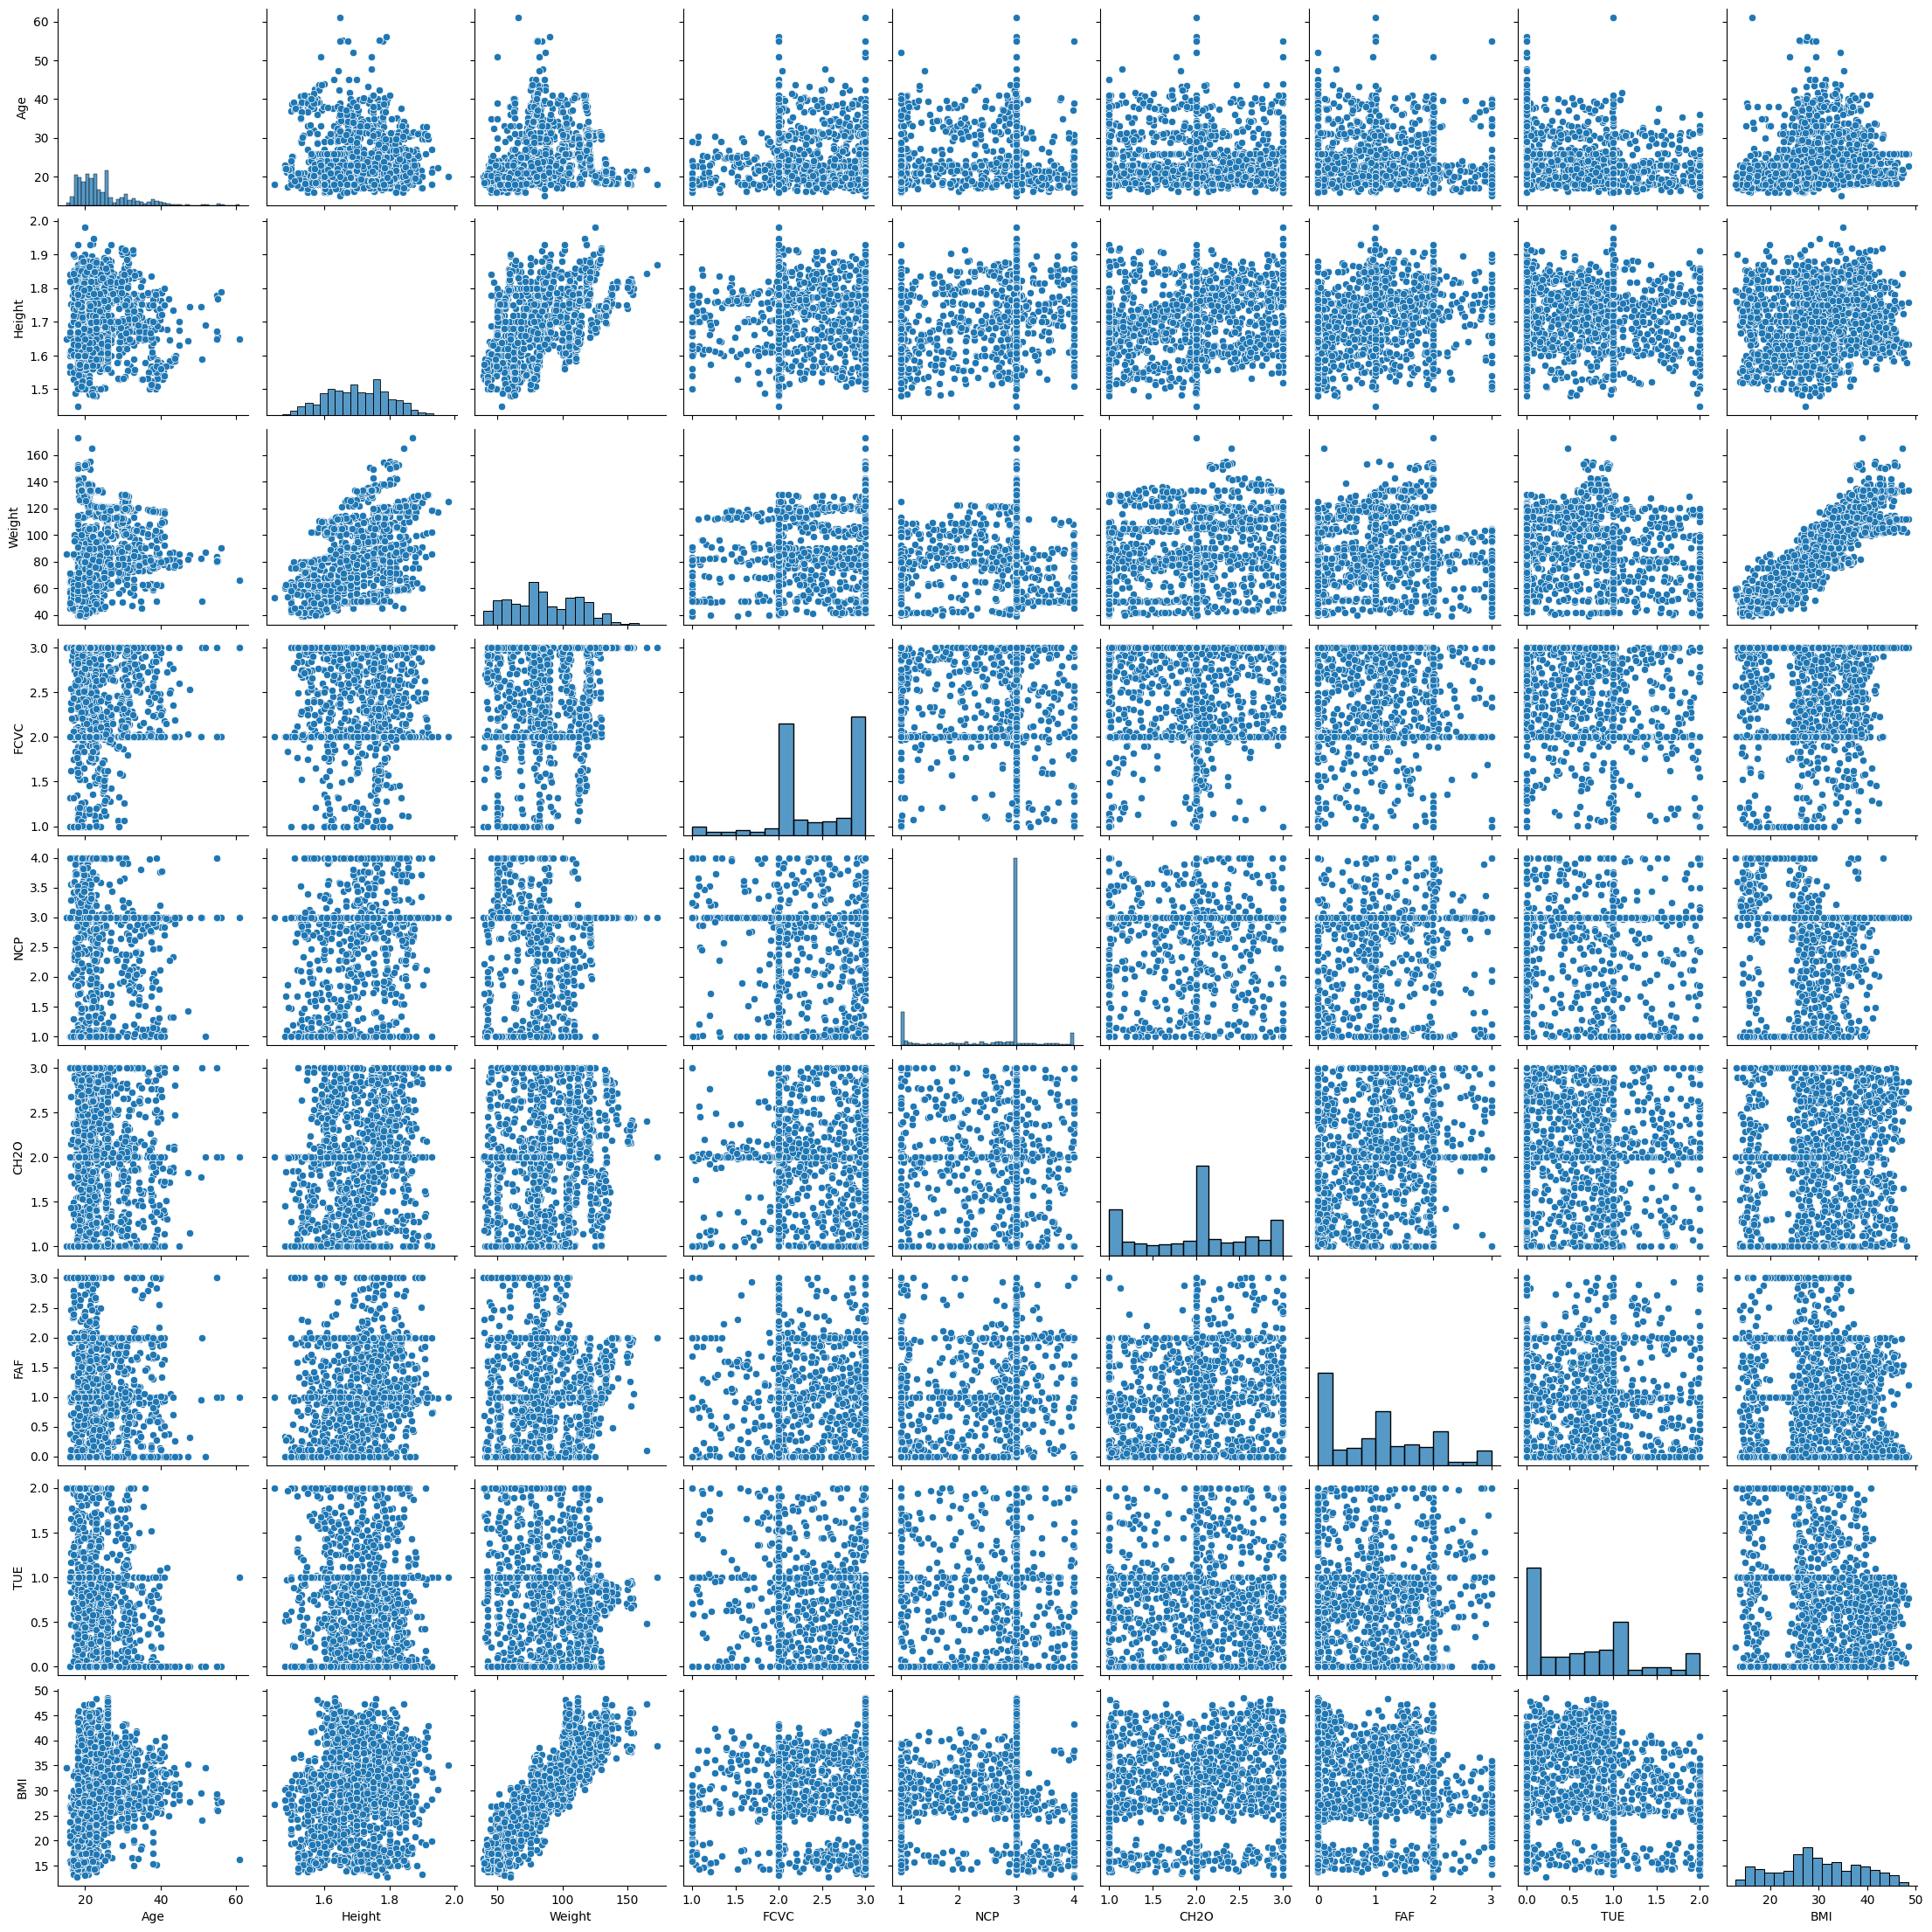

In [7]:
sns.pairplot(BMI_df)

Text(0.5, 1.0, 'Age v.s BMI')

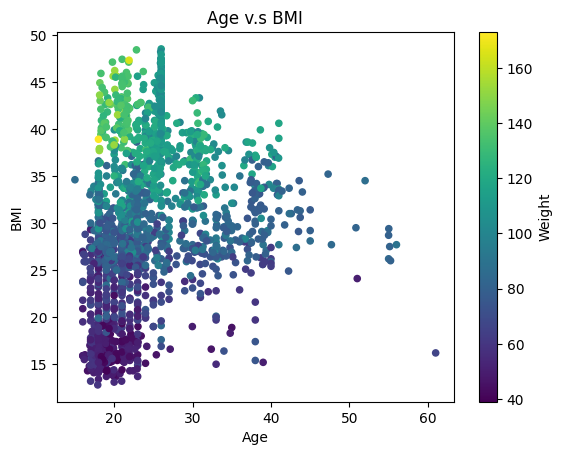

In [8]:
BMI_df.plot(kind = "scatter", x= "Age", y = "BMI", c= "Weight")
plt.title('Age v.s BMI')

Text(0.5, 1.0, 'The effect of family history on the obesity')

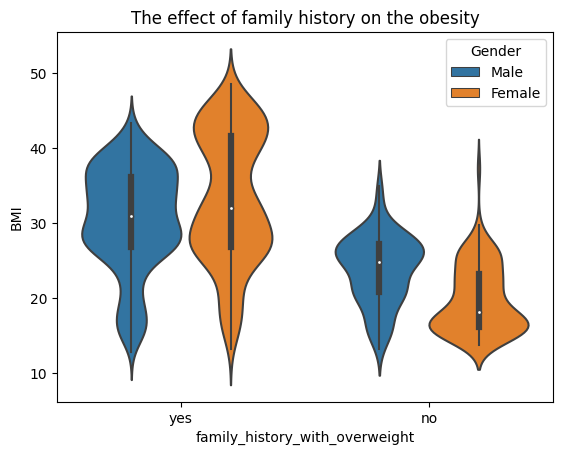

In [9]:
sns.violinplot(data= BMI_df, x="family_history_with_overweight", y="BMI", hue="Gender")
plt.title('The effect of family history on the obesity')

<AxesSubplot: xlabel='Gender', ylabel='Height'>

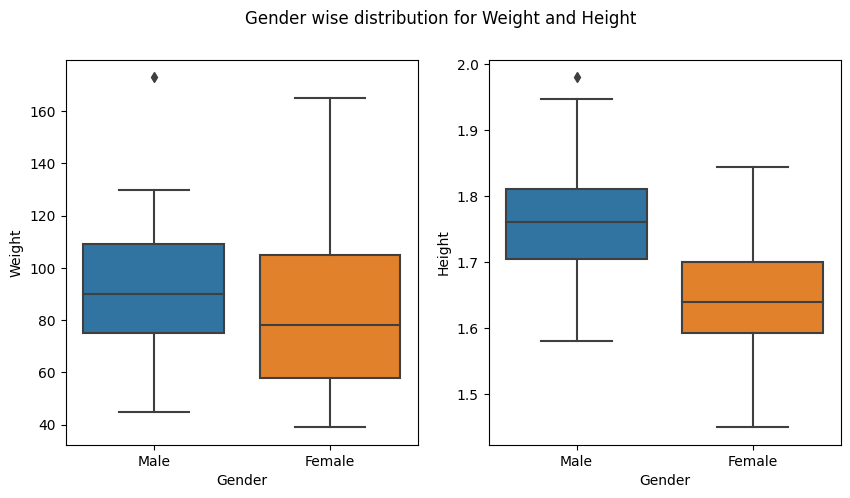

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Gender wise distribution for Weight and Height')

sns.boxplot(ax=axes[0], data=BMI_df, x='Gender', y='Weight')
sns.boxplot(ax=axes[1], data=BMI_df, x='Gender', y='Height')

Text(0, 0.5, 'Physical activity frequency')

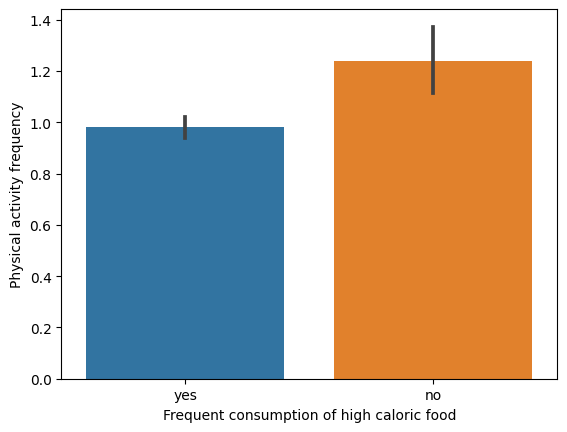

In [11]:
sns.barplot(data=BMI_df, x='FAVC', y='FAF')
plt.xlabel('Frequent consumption of high caloric food')
plt.ylabel('Physical activity frequency')

Text(0.5, 1.0, 'The ratio of smoking to alcohol consumption')

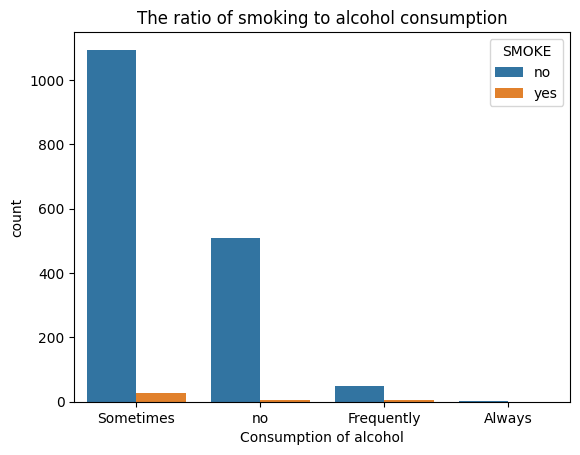

In [12]:
sns.countplot(x='CALC', hue='SMOKE', data=BMI_df)
plt.xlabel("Consumption of alcohol")
plt.title("The ratio of smoking to alcohol consumption")

Text(0, 0.5, 'Calories consumption monitoring')

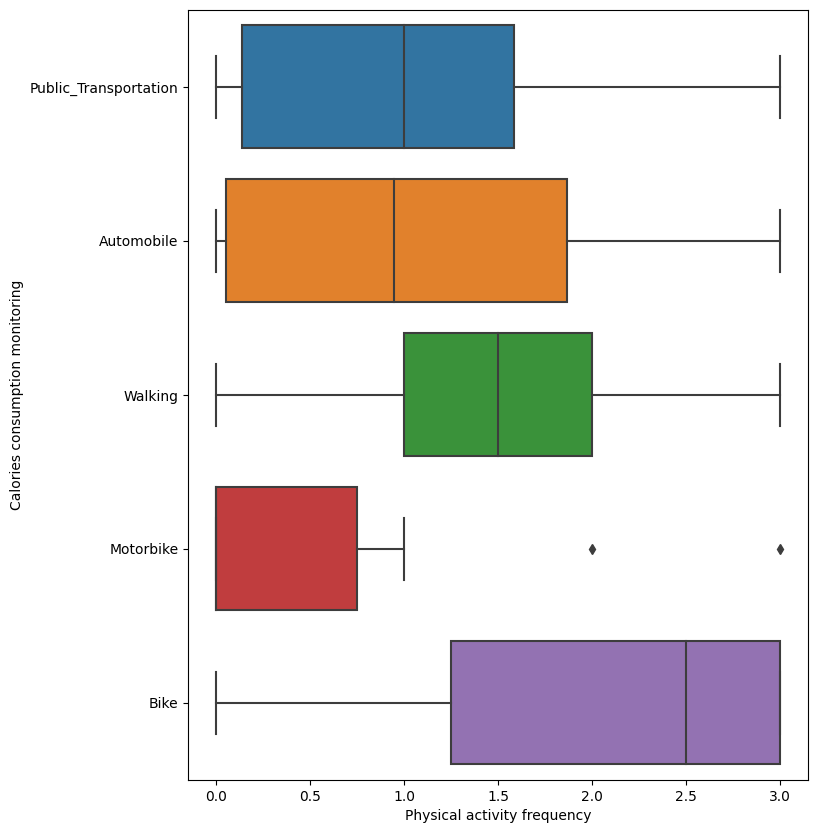

In [13]:
plt.figure(figsize=(8,10))
sns.boxplot(data=BMI_df, x="FAF", y="MTRANS")
plt.xlabel('Physical activity frequency')
plt.ylabel('Calories consumption monitoring')

In [14]:
BMI_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.461183,1.701815,86.602315,2.415164,2.674377,1.993846,1.011278,0.651985,29.897690
std,6.502643,0.093448,26.110138,0.529634,0.780938,0.611221,0.846480,0.603656,8.454453
min,15.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.800000
25%,19.856861,1.630000,65.000000,2.000000,2.607291,1.542301,0.128113,0.000000,24.600000
50%,22.886910,1.700404,83.000000,2.373567,3.000000,2.000000,1.000000,0.621035,29.300000
75%,26.012808,1.769367,108.014255,3.000000,3.000000,2.450069,1.662348,1.000000,36.600000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,48.500000


In [15]:
for col in BMI_df:
    print(f"NaN in {col} : {df[col].isnull().values.any()}")

NaN in Gender : False
NaN in Age : False
NaN in Height : False
NaN in Weight : False
NaN in family_history_with_overweight : False
NaN in FAVC : False
NaN in FCVC : False
NaN in NCP : False
NaN in CAEC : False
NaN in SMOKE : False
NaN in CH2O : False
NaN in SCC : False
NaN in FAF : False
NaN in TUE : False
NaN in CALC : False
NaN in MTRANS : False
NaN in BMI : False


In [16]:
corr_matrix = X_train.corr(numeric_only=True)
corr_matrix

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
Age,1.000000,-0.029438,0.191548,0.025412,-0.032205,-0.040662,-0.138529,-0.293831,0.242938
Height,-0.029438,1.000000,0.467825,-0.025330,0.248047,0.213941,0.309173,0.052715,0.118546
Weight,0.191548,0.467825,1.000000,0.228413,0.116163,0.205141,-0.029442,-0.063942,0.879820
FCVC,0.025412,-0.025330,0.228413,1.000000,0.048259,0.078784,0.022212,-0.101777,0.245342
NCP,-0.032205,0.248047,0.116163,0.048259,1.000000,0.053866,0.127318,0.031595,0.041935
CH2O,-0.040662,0.213941,0.205141,0.078784,0.053866,1.000000,0.170668,0.024252,0.125740
FAF,-0.138529,0.309173,-0.029442,0.022212,0.127318,0.170668,1.000000,0.065204,-0.190987
TUE,-0.293831,0.052715,-0.063942,-0.101777,0.031595,0.024252,0.065204,1.000000,-0.113633
BMI,0.242938,0.118546,0.879820,0.245342,0.041935,0.125740,-0.190987,-0.113633,1.000000


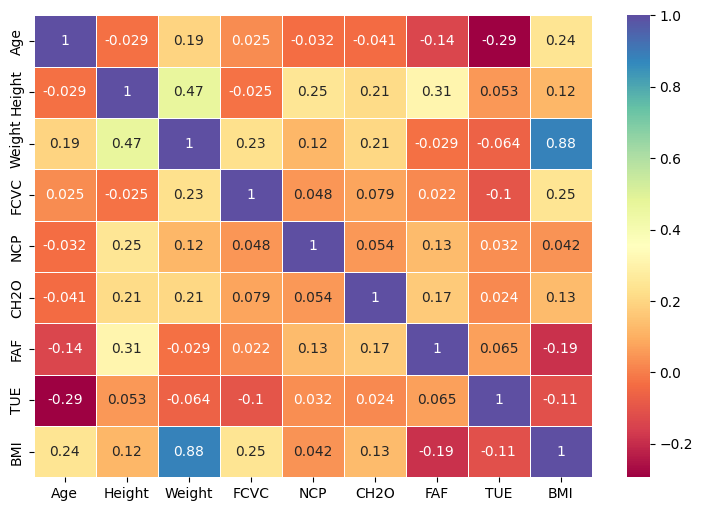

In [17]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='Spectral');

## Data Cleaning and Manipulation  
<font face="Arial" size=4><br>
Transform all categorical attributes to numerical attributes using ordinal encoders if the attribute is ordinal or one-hot encoders if the attribute is nominal.   

Add at least two attributes to the dataset using information of other columns. Explain the reasons you think the added columns are better indicators of the data.  
Scale the data and build a pipeline to be used later for test set.

In [18]:
data_categorical  = BMI_df[["family_history_with_overweight", "FAVC", "CAEC", "SMOKE","CALC"]]
#data_categorical.head()

ordinal_encoder = OrdinalEncoder()
data_encoded = ordinal_encoder.fit_transform(data_categorical)

#ordinal_encoder.categories_

In [19]:
data_1hot = BMI_df[["Gender", "SCC", "MTRANS"]]

onehot_encoder = OneHotEncoder()
One_encoded = onehot_encoder.fit_transform(data_1hot)

#onehot_encoder.categories_

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
def determine_risk_gaining_weight(row):
    if row["family_history_with_overweight"] == "yes":
        f_score = 1
    else: 
        f_score = 0

    if row["FAVC"] == "yes":
         c_score = 1
    else: 
        c_score = 0
       
    obesity_risk = f_score + c_score - row["FAF"]

    if obesity_risk > 1:
        return 2                   ## High risk
    elif obesity_risk > 0:
        return 1                   ## Medium risk
    else: 
        return 0                   ## Low risk
    

def determine_lifestyle_score(row):
    if row["SMOKE"] == "no":
        s_score = 1
    else:
        s_score = -1
    
    if row["CALC"] == "no":
        a_score = 4
    elif row["CALC"] == "Sometimes":
        a_score = 3
    elif row["CALC"] == "Frequently":
        a_score = 2
    else: 
        a_score = 1

    return a_score + s_score

class AttributeAdder(BaseEstimator, TransformerMixin):
    def fit(self, X , y=None):
        return self
    def transform(self, X):
        temp_cols = X.columns.to_list()
        temp_cols.extend(["Risk_of_gaining_weight", "life style score"])
        new_cols = {k:v for k,v in zip(range(len(temp_cols)),temp_cols)}
        obisity = X.apply(lambda row: determine_risk_gaining_weight(row), axis=1)
        life_style = X.apply(lambda row: determine_lifestyle_score(row), axis=1)
        combined_df = np.c_[X, obisity, life_style]
        return combined_df
    
attr_adder = AttributeAdder()
df_extra_attribute = attr_adder.transform(BMI_df)
#df_extra_attribute

In [21]:
BMI_extra_attr = pd.DataFrame(
    df_extra_attribute, 
    columns = list(BMI_df.columns) + ["Risk_of_gaining_weight", "life_style"],
    index = BMI_df.index)

# Answer

<ol>
    <li><p> I added a variable called the risk of being overweight, which used the combination of three family variables and consumption of high-calorie foods and physical activity.This is because if a person is genetically predisposed to obesity, then consumption of high-calorie foods and lack of physical activity and low metabolism can increase the possibility of becoming overweight.</p></li>
    <li><p>Another defined variable is the lifestyle variable, which is a combination of two variables, alcohol and smoking.Most people believe that smoking cigarettes together with drinking alcohol gives more pleasure, and alcohol as a stimulant and motivation drives the smoker to smoke.Therefore, the simultaneous consumption of alcohol and cigarettes have a direct effect on each other, each of which is considered as a factor of obesity.</p></li>
</ol>

In [22]:
BMI_num = BMI_df.drop(["family_history_with_overweight", "FAVC", "CAEC", "SMOKE","CALC","Gender", "SCC", "MTRANS"], axis = 1 )
#BMI_num

In [23]:
num_pipeline = Pipeline([('std_scl', StandardScaler()),
                        ])
BMI_num_tr = num_pipeline.fit_transform(BMI_num)
#BMI_num_tr

In [24]:
num_atr = list(BMI_num)
cat_ord = ["family_history_with_overweight", "FAVC", "CAEC", "SMOKE","CALC"]
cat_one = ["Gender", "SCC", "MTRANS"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atr),
    ("cat1", OrdinalEncoder(), cat_ord), 
    ("cat2", OneHotEncoder(), cat_one),
    ])

BMI_prepared = full_pipeline.fit_transform(BMI_df)

### Principal Component Analysis  
<font face="Arial" size=4><br>
Use `sklearn.decomposition.PCA` to reduce the dimension of dataset to a convenient number. Plot the scree plot for the final solution.

In [25]:
pca = PCA(n_components = 2)
c_pca = pca.fit_transform(BMI_prepared)

Text(0.5, 1.0, 'PC1 vs PC2')

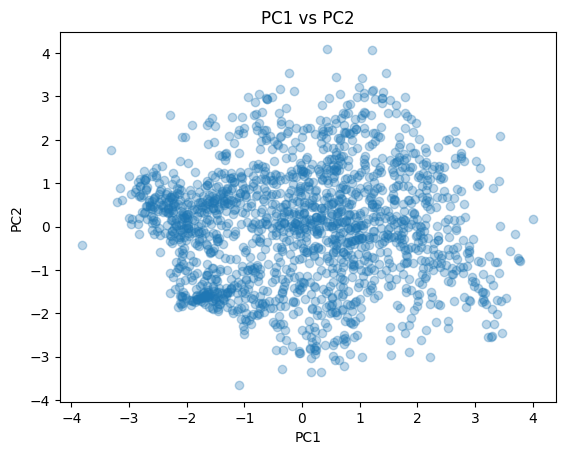

In [26]:
plt.scatter(c_pca[:,0],c_pca[:,1], alpha = 0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('PC1 vs PC2')

## Model Training  
<font face="Arial" size=4><br>
Train the <code>linear regression</code> model and its regularized forms (<code>ridge</code> and <code>lasso</code>) on your training data. Cross-validate the models using <code>10 fold CV</code> and report the accuracy scores. You are allowed to use <code>sklearn.linear_model</code> for your implementation.

### Linear Regression

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(BMI_prepared, Y_train)

LinearRegression()

In [29]:
lin_predictions = lin_reg.predict(BMI_prepared)
lin_MSE = mean_squared_error(Y_train, lin_predictions)
lin_rMSE = np.sqrt(lin_MSE)
lin_rMSE

0.3761953338103789

In [33]:
predicted_actual = {
    "True_values": Y_train, "Predicted_values": lin_predictions}
predicted_actual = pd.DataFrame(predicted_actual)

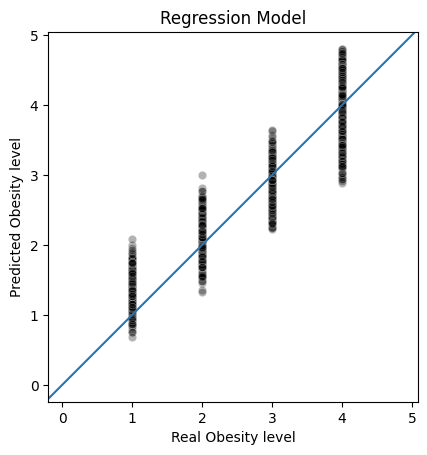

In [35]:
sns.scatterplot(data=predicted_actual,
               x="True_values", y="Predicted_values",
                color="black", alpha=0.3)
plt.xlabel("Real Obesity level")
plt.ylabel("Predicted Obesity level")
plt.axline((0, 0), slope=1, label="Perfect fit")
plt.axis('square')
_ = plt.title("Regression Model")


### Ridge Regression

In [36]:
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(BMI_prepared, Y_train)

Ridge(alpha=10)

In [37]:
rid_prediction = ridgeReg.predict(BMI_prepared)
R_mse = mean_squared_error(Y_train, rid_prediction)
R_rMSE = np.sqrt(R_mse)
R_rMSE

0.3763894899763064

### Lasso Regression

In [38]:
lasso = Lasso(alpha = 10)
lasso.fit(BMI_prepared, Y_train)

Lasso(alpha=10)

In [39]:
ls_prediction = lasso.predict(BMI_prepared)
ls_mse = mean_squared_error(Y_train, ls_prediction)
ls_rMSE = np.sqrt(ls_mse)
ls_rMSE

1.048340368508767

In [40]:
def display_score(score):
    print("Scores: ", score)
    print("Mean: ", score.mean())
    print("Standard Deviation: ", score.std())

In [41]:
lin_score = cross_val_score(lin_reg, BMI_prepared, Y_train,
                           scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_score = np.sqrt(-lin_score)
display_score(lin_rmse_score)

Scores:  [0.37626797 0.36782688 0.37736237 0.35639829 0.37615663 0.41407964
 0.38339041 0.38337502 0.39927687 0.37824783]
Mean:  0.3812381912052466
Standard Deviation:  0.015114651609100752


In [42]:
Rid_score = cross_val_score(ridgeReg, BMI_prepared, Y_train,
                           scoring = 'neg_mean_squared_error', cv = 10)
Rid_rmse_score = np.sqrt(-Rid_score)
display_score(Rid_rmse_score)

Scores:  [0.37585664 0.36859797 0.3774151  0.35504658 0.37702459 0.41332814
 0.38331316 0.38401229 0.39861717 0.37826626]
Mean:  0.38114778953896217
Standard Deviation:  0.015032140467494024


In [43]:
Ls_score = cross_val_score(lasso, BMI_prepared, Y_train,
                           scoring = 'neg_mean_squared_error', cv = 10)
Ls_rmse_score = np.sqrt(-Ls_score)
display_score(Ls_rmse_score)

Scores:  [1.06587757 1.12424044 1.09782987 1.0062951  0.97037308 1.07925252
 1.08555347 1.05648945 1.00039528 0.99044477]
Mean:  1.047675154348211
Standard Deviation:  0.04941384391606892


## Final Report  
<font face="Arial" size=4><br>
After training the data, use your pipeline previously created to transform the test data to decent form and then run your final model and report the accuracy score.

In [44]:
final_model = ridgeReg
X_test_prepared = full_pipeline.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)

final_MSE = mean_squared_error(Y_test, final_prediction)
final_rMSE = np.sqrt(final_MSE)
final_rMSE

0.39328402507949684

<font face="Arial" size=4><br>
Discuss why you think this model worked best for the selected datasets and mention 3 areas where extra effort can be put into work to enhance the accuracy.

# Answer:
<p>According to the score of each model, it can be seen that the Ridge Regression model has the least error compared to other models, and that is why I chose it as the final model.</p>
<p>Three ways to improve the model can be the following:</p>
<ol>
    <li><p>Add More Data: Having more data is always a good idea. It allows the “data to tell for itself” instead of relying on assumptions and weak correlations. Presence of more data results in better and more accurate machine-learning models.</p></li>
    <li><p>Statistical Parameters: We also consider the p-values, information values, and other statistical metrics to select the right features.</p></li>
    <li><p>Algorithm Tuning: We know that machine learning algorithms are driven by hyperparameters. These hyperparameters majorly influence the outcome of the learning process.</p></li>
</ol>